In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Artificial Neural Networks

## Imports & setup

In [3]:
import pathlib
import datetime
from os import PathLike
from typing import Union

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import palettable
import seaborn as sns
%matplotlib inline

PROJECT_DIR = pathlib.Path.cwd().parent.resolve()
CLEAN_DATA_DIR = PROJECT_DIR / 'data' / '05-clean'

plt.style.use('grayscale')
# Custom Overrides to grayscale
params = {'legend.fontsize': 'x-large',
          'lines.linewidth': 0.75,
      'figure.figsize': (15, 7),
          'grid.color': 'white',
          'axes.axisbelow': False,
          'axes.grid': True,
          'axes.grid.axis': 'y',
     'axes.labelsize': 'x-large',
     'axes.titlesize':'xx-large',
     'xtick.labelsize':'x-large',
     'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
figsize=(15,7)

## Load Data

In [5]:
df_files = pd.read_csv("/content/Power Mitacs 2023.csv")

daymapper = {0.0: 'Mon', 1.0: 'Tue', 2.0: 'Wed', 3.0: 'Thu', 4.0: 'Fri', 5.0: 'Sat', 6.0: 'Sun'}
weekdaymapper = {0.0: 'Weekday', 1.0: 'Weekday', 2.0: 'Weekday', 3.0: 'Weekday', 4.0: 'Weekday',
                 5.0: 'Weekend', 6.0: 'Weekend'}
df_files['dayofweek'] = df_files['Day Of Week'].map(daymapper)
df_files['daytype'] = df_files['Day Of Week'].map(weekdaymapper)
df_files['Date'] = df_files['Date'].str.replace(' 00:00:00', '')

In [6]:
df_files.head()

,Date,Time,Year,Quarter,Month,Day Of Week,Day Of Year,Week Of Year,Hour Of Day,Day Light Hours,...,Temperature,Dew Point Temperature,Relative Humidity,Wind Speed,Visibility,Pressure,Daily Peak,Hourly Demand,dayofweek,daytype
0,2017-01-01,00:00:00,2017,1,1,4,1,53,0,0,...,0.8,0.1,95.0,7.0,12.9,99.17,17915,14403,Fri,Weekday
1,2017-01-01,01:00:00,2017,1,1,4,1,53,1,0,...,0.6,0.0,96.0,9.0,9.7,99.13,17915,13814,Fri,Weekday
2,2017-01-01,02:00:00,2017,1,1,4,1,53,2,0,...,0.7,0.0,95.0,13.0,9.7,99.13,17915,13366,Fri,Weekday
3,2017-01-01,03:00:00,2017,1,1,4,1,53,3,0,...,0.5,-0.5,93.0,9.0,16.1,99.18,17915,13120,Fri,Weekday
4,2017-01-01,04:00:00,2017,1,1,4,1,53,4,0,...,0.5,-0.6,92.0,9.0,16.1,99.17,17915,13075,Fri,Weekday


In [7]:
df_files.tail()

,Date,Time,Year,Quarter,Month,Day Of Week,Day Of Year,Week Of Year,Hour Of Day,Day Light Hours,...,Temperature,Dew Point Temperature,Relative Humidity,Wind Speed,Visibility,Pressure,Daily Peak,Hourly Demand,dayofweek,daytype
57030,2023-07-04,06:00:00,2023,3,7,0,186,27,6,1,...,16.9,10.1,64.0,7.0,24.1,99.68,19662,14544,Mon,Weekday
57031,2023-07-04,07:00:00,2023,3,7,0,186,27,7,1,...,20.0,8.2,46.0,1.0,24.1,99.67,19662,15478,Mon,Weekday
57032,2023-07-04,08:00:00,2023,3,7,0,186,27,8,1,...,22.5,7.7,38.0,3.0,24.1,99.67,19662,16190,Mon,Weekday
57033,2023-07-04,09:00:00,2023,3,7,0,186,27,9,1,...,24.6,8.8,36.0,10.0,24.1,99.61,19662,16643,Mon,Weekday
57034,2023-07-04,10:00:00,2023,3,7,0,186,27,10,1,...,25.4,8.2,33.0,14.0,24.1,99.55,19662,17039,Mon,Weekday


In [8]:
df_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57035 entries, 0 to 57034
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   57035 non-null  object 
 1   Time                   57035 non-null  object 
 2   Year                   57035 non-null  int64  
 3   Quarter                57035 non-null  int64  
 4   Month                  57035 non-null  int64  
 5   Day Of Week            57035 non-null  int64  
 6   Day Of Year            57035 non-null  int64  
 7   Week Of Year           57035 non-null  int64  
 8   Hour Of Day            57035 non-null  int64  
 9   Day Light Hours        57035 non-null  int64  
 10  Stat Holiday           57035 non-null  int64  
 11  Temperature            57035 non-null  float64
 12  Dew Point Temperature  57035 non-null  float64
 13  Relative Humidity      57035 non-null  float64
 14  Wind Speed             57035 non-null  float64
 15  Vi

In [ ]:
for col in df_orig.columns:
    print(col)

temp
dew_point_temp
rel_hum
wind_speed
visibility
press
hmdx
wind_chill
weather
hour_of_day
year
month
day_of_week
day_of_year
week_of_year
quarter
stat_hol
day_light_hours
hourly_demand
daily_peak
dayofweek
daytype


In [10]:
df_files['Year'].value_counts()

2019    8784
2017    8760
2018    8760
2020    8760
2021    8760
2022    8760
2023    4451
Name: Year, dtype: int64

### Training Data for Every Hour - 2017 - 2022

In [11]:
pd.set_option('display.max_columns', 100)


# Convert the 'Date' column to datetime type
df_files['Date'] = pd.to_datetime(df_files['Date'], dayfirst=True, errors='coerce')

# Find the index of the row with the invalid date
invalid_date_index = df_files[df_files['Date'].isnull()].index

# Remove the row with the invalid date
df_files = df_files.drop(invalid_date_index)

# Filter rows based on the year range
df_filtered = df_files[df_files['Date'].dt.year.between(2017, 2022)]
df_filtered.head()

,Date,Time,Year,Quarter,Month,Day Of Week,Day Of Year,Week Of Year,Hour Of Day,Day Light Hours,Stat Holiday,Temperature,Dew Point Temperature,Relative Humidity,Wind Speed,Visibility,Pressure,Daily Peak,Hourly Demand,dayofweek,daytype
0,2017-01-01,00:00:00,2017,1,1,4,1,53,0,0,1,0.8,0.1,95.0,7.0,12.9,99.17,17915,14403,Fri,Weekday
1,2017-01-01,01:00:00,2017,1,1,4,1,53,1,0,1,0.6,0.0,96.0,9.0,9.7,99.13,17915,13814,Fri,Weekday
2,2017-01-01,02:00:00,2017,1,1,4,1,53,2,0,1,0.7,0.0,95.0,13.0,9.7,99.13,17915,13366,Fri,Weekday
3,2017-01-01,03:00:00,2017,1,1,4,1,53,3,0,1,0.5,-0.5,93.0,9.0,16.1,99.18,17915,13120,Fri,Weekday
4,2017-01-01,04:00:00,2017,1,1,4,1,53,4,0,1,0.5,-0.6,92.0,9.0,16.1,99.17,17915,13075,Fri,Weekday


In [12]:
df_filtered.tail()

,Date,Time,Year,Quarter,Month,Day Of Week,Day Of Year,Week Of Year,Hour Of Day,Day Light Hours,Stat Holiday,Temperature,Dew Point Temperature,Relative Humidity,Wind Speed,Visibility,Pressure,Daily Peak,Hourly Demand,dayofweek,daytype
52579,2022-12-31,19:00:00,2022,4,12,3,365,53,19,0,0,0.4,-4.4,70.0,18.0,24.1,99.85,17219,16486,Thu,Weekday
52580,2022-12-31,20:00:00,2022,4,12,3,365,53,20,0,0,0.2,-3.7,75.0,12.0,24.1,99.86,17219,15801,Thu,Weekday
52581,2022-12-31,21:00:00,2022,4,12,3,365,53,21,0,0,0.3,-4.4,71.0,24.0,24.1,99.80,17219,15048,Thu,Weekday
52582,2022-12-31,22:00:00,2022,4,12,3,365,53,22,0,0,0.2,-5.0,68.0,23.0,24.1,99.76,17219,14465,Thu,Weekday
52583,2022-12-31,23:00:00,2022,4,12,3,365,53,23,0,0,0.0,-5.2,68.0,25.0,24.1,99.70,17219,13892,Thu,Weekday


In [13]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [14]:
df_filtered.columns

Index(['Date', 'Time', 'Year', 'Quarter', 'Month', 'Day Of Week',
       'Day Of Year', 'Week Of Year', 'Hour Of Day', 'Day Light Hours',
       'Stat Holiday', 'Temperature', 'Dew Point Temperature',
       'Relative Humidity', 'Wind Speed', 'Visibility', 'Pressure',
       'Daily Peak', 'Hourly Demand', 'dayofweek', 'daytype'],
      dtype='object')

In [16]:
features_train = df_filtered[['Quarter', 'Month', 'Day Of Week','Day Of Year', 'Week Of Year', 'Hour Of Day','Temperature', 'Dew Point Temperature','Relative Humidity', 'Wind Speed', 'Visibility', 'Pressure','Daily Peak', 'Hourly Demand']]
features_train
scaler=StandardScaler()
Train=scaler.fit_transform(np.array(features_train))
Train

array([[-1.35174944e+00, -1.60274527e+00,  4.99686147e-01, ...,
        -4.31838425e-01, -2.32372144e-01, -6.66383710e-01],
       [-1.35174944e+00, -1.60274527e+00,  4.99686147e-01, ...,
        -4.85435879e-01, -2.32372144e-01, -9.08874573e-01],
       [-1.35174944e+00, -1.60274527e+00,  4.99686147e-01, ...,
        -4.85435879e-01, -2.32372144e-01, -1.09331584e+00],
       ...,
       [ 1.33457658e+00,  1.58764752e+00, -2.28271424e-04, ...,
         4.12321480e-01, -5.83757598e-01, -4.00837689e-01],
       [ 1.33457658e+00,  1.58764752e+00, -2.28271424e-04, ...,
         3.58724026e-01, -5.83757598e-01, -6.40858356e-01],
       [ 1.33457658e+00,  1.58764752e+00, -2.28271424e-04, ...,
         2.78327845e-01, -5.83757598e-01, -8.76762031e-01]])

In [17]:
cmatrix = features_train.corr()
round(cmatrix, ndigits=5)

,Quarter,Month,Day Of Week,Day Of Year,Week Of Year,Hour Of Day,Temperature,Dew Point Temperature,Relative Humidity,Wind Speed,Visibility,Pressure,Daily Peak,Hourly Demand
Quarter,1.00000,0.97136,-0.00297,0.96822,0.94276,0.00000,0.30358,0.34640,0.10891,-0.08284,0.04309,0.02772,-0.11688,-0.14665
Month,0.97136,1.00000,-0.00361,0.99650,0.96627,0.00000,0.29737,0.34408,0.11872,-0.08839,0.03801,0.04272,-0.12295,-0.15052
Day Of Week,-0.00297,-0.00361,1.00000,-0.00343,-0.00027,-0.00000,-0.01559,-0.01889,-0.00914,-0.00789,0.01303,0.04679,-0.32349,-0.22526
Day Of Year,0.96822,0.99650,-0.00343,1.00000,0.96736,0.00000,0.29427,0.34141,0.12015,-0.08790,0.03750,0.03985,-0.12087,-0.14854
Week Of Year,0.94276,0.96627,-0.00027,0.96736,1.00000,0.00000,0.29559,0.34511,0.12822,-0.08385,0.02955,0.02997,-0.12036,-0.14881
Hour Of Day,0.00000,0.00000,-0.00000,0.00000,0.00000,1.00000,0.09961,0.01391,-0.24911,0.13499,0.03009,-0.00854,-0.00000,0.45919
Temperature,0.30358,0.29737,-0.01559,0.29427,0.29559,0.09961,1.00000,0.93853,-0.19220,-0.13078,0.13418,-0.19999,-0.15925,-0.03755
Dew Point Temperature,0.34640,0.34408,-0.01889,0.34141,0.34511,0.01391,0.93853,1.00000,0.15280,-0.20908,-0.01891,-0.28030,-0.13305,-0.10862
Relative Humidity,0.10891,0.11872,-0.00914,0.12015,0.12822,-0.24911,-0.19220,0.15280,1.00000,-0.22812,-0.50982,-0.24615,0.06991,-0.20246
Wind Speed,-0.08284,-0.08839,-0.00789,-0.08790,-0.08385,0.13499,-0.13078,-0.20908,-0.22812,1.00000,0.08422,-0.27357,0.04371,0.19904


In [18]:
df_files.tail()

,Date,Time,Year,Quarter,Month,Day Of Week,Day Of Year,Week Of Year,Hour Of Day,Day Light Hours,Stat Holiday,Temperature,Dew Point Temperature,Relative Humidity,Wind Speed,Visibility,Pressure,Daily Peak,Hourly Demand,dayofweek,daytype
57030,2023-07-04,06:00:00,2023,3,7,0,186,27,6,1,0,16.9,10.1,64.0,7.0,24.1,99.68,19662,14544,Mon,Weekday
57031,2023-07-04,07:00:00,2023,3,7,0,186,27,7,1,0,20.0,8.2,46.0,1.0,24.1,99.67,19662,15478,Mon,Weekday
57032,2023-07-04,08:00:00,2023,3,7,0,186,27,8,1,0,22.5,7.7,38.0,3.0,24.1,99.67,19662,16190,Mon,Weekday
57033,2023-07-04,09:00:00,2023,3,7,0,186,27,9,1,0,24.6,8.8,36.0,10.0,24.1,99.61,19662,16643,Mon,Weekday
57034,2023-07-04,10:00:00,2023,3,7,0,186,27,10,1,0,25.4,8.2,33.0,14.0,24.1,99.55,19662,17039,Mon,Weekday


In [19]:
pd.set_option('display.max_columns', 100)

dftest = df_files[df_files['Date'].dt.year == 2023]
dftest.head()

,Date,Time,Year,Quarter,Month,Day Of Week,Day Of Year,Week Of Year,Hour Of Day,Day Light Hours,Stat Holiday,Temperature,Dew Point Temperature,Relative Humidity,Wind Speed,Visibility,Pressure,Daily Peak,Hourly Demand,dayofweek,daytype
52584,2023-01-01,00:00:00,2023,1,1,4,1,53,0,0,1,-0.3,-5.1,70.0,20.0,24.1,99.67,16979,13417,Fri,Weekday
52585,2023-01-01,01:00:00,2023,1,1,4,1,53,1,0,1,-0.3,-5.5,68.0,25.0,24.1,99.63,16979,12968,Fri,Weekday
52586,2023-01-01,02:00:00,2023,1,1,4,1,53,2,0,1,-0.4,-4.7,73.0,26.0,24.1,99.59,16979,12395,Fri,Weekday
52587,2023-01-01,03:00:00,2023,1,1,4,1,53,3,0,1,-0.4,-4.7,73.0,30.0,24.1,99.56,16979,12228,Fri,Weekday
52588,2023-01-01,04:00:00,2023,1,1,4,1,53,4,0,1,-0.4,-5.6,68.0,31.0,24.1,99.53,16979,12116,Fri,Weekday


In [20]:
features_test = dftest[['Quarter', 'Month', 'Day Of Week','Day Of Year', 'Week Of Year', 'Hour Of Day','Temperature', 'Dew Point Temperature','Relative Humidity', 'Wind Speed', 'Visibility', 'Pressure','Daily Peak', 'Hourly Demand']]
Test = scaler.fit_transform(np.array(features_test))
Test

array([[-0.99165546, -1.46334143,  0.47966419, ...,  0.28879657,
        -0.33865982, -0.8903137 ],
       [-0.99165546, -1.46334143,  0.47966419, ...,  0.24044788,
        -0.33865982, -1.09899154],
       [-0.99165546, -1.46334143,  0.47966419, ...,  0.1920992 ,
        -0.33865982, -1.36529979],
       ...,
       [ 2.74456474,  1.94803957, -1.52172447, ...,  0.28879657,
         1.1802607 ,  0.39846949],
       [ 2.74456474,  1.94803957, -1.52172447, ...,  0.21627354,
         1.1802607 ,  0.60900638],
       [ 2.74456474,  1.94803957, -1.52172447, ...,  0.14375051,
         1.1802607 ,  0.79305187]])

In [21]:
# x_train=Train[:,:-1]
# y_train=Train[:,-1]
# x_test=Test[:,:-1]
# y_test=Test[:,-1]

In [22]:
print(Train[0,:-1])
print(Train[1,:-1])
print(Train[2,:-1])
print(np.concatenate((Train[0,:-1], Train[1,:-1], Train[2,:-1])))

[-1.35174944 -1.60274527  0.49968615 -1.72798725  1.75376131 -1.66132477
 -0.74971371 -0.32433982  1.55263493 -0.95913709 -1.6248819  -0.43183843
 -0.23237214]
[-1.35174944 -1.60274527  0.49968615 -1.72798725  1.75376131 -1.51686175
 -0.76767443 -0.33385228  1.61457245 -0.74674757 -2.2146227  -0.48543588
 -0.23237214]
[-1.35174944 -1.60274527  0.49968615 -1.72798725  1.75376131 -1.37239873
 -0.75869407 -0.33385228  1.55263493 -0.32196853 -2.2146227  -0.48543588
 -0.23237214]
[-1.35174944 -1.60274527  0.49968615 -1.72798725  1.75376131 -1.66132477
 -0.74971371 -0.32433982  1.55263493 -0.95913709 -1.6248819  -0.43183843
 -0.23237214 -1.35174944 -1.60274527  0.49968615 -1.72798725  1.75376131
 -1.51686175 -0.76767443 -0.33385228  1.61457245 -0.74674757 -2.2146227
 -0.48543588 -0.23237214 -1.35174944 -1.60274527  0.49968615 -1.72798725
  1.75376131 -1.37239873 -0.75869407 -0.33385228  1.55263493 -0.32196853
 -2.2146227  -0.48543588 -0.23237214]


In [23]:
np.stack([Train[j,-1] for j in range(0, 12)])

array([-0.66638371, -0.90887457, -1.09331584, -1.19459386, -1.21312032,
       -1.14766014, -1.02415036, -0.95663169, -0.90887457, -0.71990461,
       -0.47906055, -0.27032902])

In [24]:
print(Train.shape)
print(Train[2:].shape)
x_train = np.array([np.concatenate((Train[i-2], Train[i-1], Train[i])) for i in range(2, len(Train)-24)])
x_test = np.array([np.concatenate((Test[i-2], Test[i-1], Test[i])) for i in range(2, len(Test)-24)])[:500]
print(f'x_train.shape: {x_train.shape} x_test.shape: {x_test.shape}')
y_train = np.array([np.stack([Train[i+j+1,-1] for j in range(0, 24)]) for i in range(2, len(Train)-24)])
y_test = np.array([np.stack([Test[i+j+1,-1] for j in range(0, 24)]) for i in range(2, len(Test)-24)])[:500]
print(f'y_train.shape: {y_train.shape} y_test.shape: {y_test.shape}')

(52560, 14)
(52558, 14)
x_train.shape: (52534, 42) x_test.shape: (500, 42)
y_train.shape: (52534, 24) y_test.shape: (500, 24)


In [25]:
y_test[1].shape

(24,)

#Artificial Neural Network Concepts

In [26]:
from random import choice
from random import uniform
from numpy.random import randint
import random

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn import metrics
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error


In [28]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

In [29]:
def ANN_model(lr, batch_sz, ep):
  model = Sequential()
  # Defining the input layer
  # model.add(Dense(units=f1, input_dim=x_train.shape[1], kernel_initializer='normal', activation=a1))
  model.add(Dense(units=36, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-5), bias_regularizer=regularizers.L2(1e-5), activity_regularizer=regularizers.L2(1e-5)))


  # Defining the  two hidden layers
  # model.add(Dense(units=f2, kernel_initializer='normal', activation=a2))
  model.add(Dense(units=64, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-5), bias_regularizer=regularizers.L2(1e-5), activity_regularizer=regularizers.L2(1e-5)))
  model.add(Dense(units=36, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-5), bias_regularizer=regularizers.L2(1e-5), activity_regularizer=regularizers.L2(1e-5)))



  # Defining the output layer of the model
  model.add(Dense(24, kernel_initializer='normal',activation='linear'))

  # if op == "sgd":
  #   op = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.5, decay=0.009, nesterov=True)

  # elif op == "adamax":
  #   op = tf.keras.optimizers.Adamax(learning_rate=lr, beta_1=0.9,beta_2=0.999,epsilon=1e-07)

  # elif op == "adam":
  #   op = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

  # elif op == "adagrad":
  #   op = tf.keras.optimizers.Adagrad(learning_rate=lr, initial_accumulator_value=0.1,epsilon=1e-07)

  # else:
  #   op == tf.keras.optimizers.Nadam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

  # Compiling the model
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01,decay_steps=10000,decay_rate=0.9)
  optimiser = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='Adam')

  # Early_Stopping
  callback = [EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5, min_delta=0.0001),
              # ModelCheckpoint(filepath="fname.hdf5", save_weights_only=True, monitor='val_loss', mode='max', save_best_only=True)
              ]

  # Fitting the ANN to the Training set
  model.fit(x_train, y_train, batch_size = batch_size_trial, epochs = epochs_trial,validation_data=(x_val,y_val),callbacks=[callback],verbose=0)

  return model

In [30]:
# Fitness evaluation metric: Classification Accuracy
from keras.losses import mean_squared_error as MSE
from keras.losses import MeanAbsoluteError
def fitness_evaluation(model):
  #mean_absolute_percentage_error = tf.keras.losses.MeanAbsolutePercentageError()
  #metrics = kl(y_test, model.predict(x_test)).numpy()
  #metrics = mean_absolute_percentage_error(y_test, model.predict(x_test)).numpy()
  MSE = tf.keras.losses.MeanSquaredError()
  metrics = MSE(y_test, model.predict(x_test)).numpy().mean()
  print(f"metrics:{metrics}")
  return metrics

In [31]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [35]:
# Defining the list of hyper parameters to try
batch_sz=[8,12,20,24]
ep= [500,1000]
lr=[0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]

import pandas as pd
SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'Parameters', "learning_rate", "MAPE"])

# initializing trials
TrialNumber = 0
for batch_size_trial in batch_sz:
  for epochs_trial in ep:
    for learning_rate in lr:
      TrialNumber += 1
      # create ANN model
      model = Sequential()
      # Defining the input layer
      model.add(Dense(units=36, input_dim=x_train.shape[1], kernel_initializer='normal', activation='sigmoid', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-5), bias_regularizer=regularizers.L2(1e-5), activity_regularizer=regularizers.L2(1e-5)))

      # Defining the first hidden layer
      model.add(Dense(units=36, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-5), bias_regularizer=regularizers.L2(1e-5), activity_regularizer=regularizers.L2(1e-5)))

      # Defining the output layer of the model
      model.add(Dense(24, kernel_initializer='normal', activation='linear'))  # Adjusted the output units to match the number of timesteps (24)

      # Define learning rate decay
      lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate, decay_steps=10000, decay_rate=0.9)
      optimiser = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

      # Compiling the model
      model.compile(loss='mean_squared_error', optimizer=optimiser)

      # Early_Stopping
      callback = [EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5, min_delta=0.0001)]

      # Fitting the ANN to the Training set
      model.fit(x_train, y_train, batch_size=batch_size_trial, epochs=epochs_trial, validation_data=(x_val, y_val), callbacks=callback, verbose=0)
      y_pred_train = model.predict(x_train)
      MAPE = mean_absolute_percentage_error(y_train, y_pred_train)

      # printing the results of the current iteration
      print(TrialNumber, 'Parameters:', 'batch_size:', batch_size_trial, '-', 'epochs:', epochs_trial, "lr:", learning_rate, "MAPE:", MAPE)
      SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))

SearchResultsData.to_csv("Results.csv")


1232/1232 [==============================] - 1s 797us/step
1 Parameters: batch_size: 8 - epochs: 500 lr: 0.5 MAPE: 1.1722141627410603


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 808us/step
2 Parameters: batch_size: 8 - epochs: 500 lr: 0.1 MAPE: 1.588581945564249


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 805us/step
3 Parameters: batch_size: 8 - epochs: 500 lr: 0.05 MAPE: 1.2482575920267187


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 801us/step
4 Parameters: batch_size: 8 - epochs: 500 lr: 0.01 MAPE: 1.1855845514590952


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 764us/step
5 Parameters: batch_size: 8 - epochs: 500 lr: 0.005 MAPE: 1.2218863244061502


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 822us/step
6 Parameters: batch_size: 8 - epochs: 500 lr: 0.001 MAPE: 1.2902103464412857


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 800us/step
7 Parameters: batch_size: 8 - epochs: 500 lr: 0.0005 MAPE: 1.3185005418640634


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 911us/step
8 Parameters: batch_size: 8 - epochs: 500 lr: 0.0001 MAPE: 1.722365743613414


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 781us/step
9 Parameters: batch_size: 8 - epochs: 1000 lr: 0.5 MAPE: 1.2691061983235208


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 804us/step
10 Parameters: batch_size: 8 - epochs: 1000 lr: 0.1 MAPE: 1.2839151041819667


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 794us/step
11 Parameters: batch_size: 8 - epochs: 1000 lr: 0.05 MAPE: 1.247502262863747


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 799us/step
12 Parameters: batch_size: 8 - epochs: 1000 lr: 0.01 MAPE: 1.2311920141579311


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 788us/step
13 Parameters: batch_size: 8 - epochs: 1000 lr: 0.005 MAPE: 1.30983086774768


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 810us/step
14 Parameters: batch_size: 8 - epochs: 1000 lr: 0.001 MAPE: 1.2580386772743108


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 959us/step
15 Parameters: batch_size: 8 - epochs: 1000 lr: 0.0005 MAPE: 1.3076742188710395


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 822us/step
16 Parameters: batch_size: 8 - epochs: 1000 lr: 0.0001 MAPE: 1.6780713568945262


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 1ms/step
17 Parameters: batch_size: 12 - epochs: 500 lr: 0.5 MAPE: 1.6970382006087323


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 805us/step
18 Parameters: batch_size: 12 - epochs: 500 lr: 0.1 MAPE: 1.3123456733654388


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 956us/step
19 Parameters: batch_size: 12 - epochs: 500 lr: 0.05 MAPE: 2.046407749661572


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 805us/step
20 Parameters: batch_size: 12 - epochs: 500 lr: 0.01 MAPE: 1.294701698811764


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 834us/step
21 Parameters: batch_size: 12 - epochs: 500 lr: 0.005 MAPE: 1.353945921620505


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 852us/step
22 Parameters: batch_size: 12 - epochs: 500 lr: 0.001 MAPE: 1.285819568024972


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 830us/step
23 Parameters: batch_size: 12 - epochs: 500 lr: 0.0005 MAPE: 1.33834733080441


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 821us/step
24 Parameters: batch_size: 12 - epochs: 500 lr: 0.0001 MAPE: 1.6332504865545312


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 847us/step
25 Parameters: batch_size: 12 - epochs: 1000 lr: 0.5 MAPE: 1.1896712544119967


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 810us/step
26 Parameters: batch_size: 12 - epochs: 1000 lr: 0.1 MAPE: 1.137426378619531


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 806us/step
27 Parameters: batch_size: 12 - epochs: 1000 lr: 0.05 MAPE: 2.8311182577788734


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 793us/step
28 Parameters: batch_size: 12 - epochs: 1000 lr: 0.01 MAPE: 1.2855697922287763


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 803us/step
29 Parameters: batch_size: 12 - epochs: 1000 lr: 0.005 MAPE: 1.170887250889236


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 822us/step
30 Parameters: batch_size: 12 - epochs: 1000 lr: 0.001 MAPE: 1.2867347315858007


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 847us/step
31 Parameters: batch_size: 12 - epochs: 1000 lr: 0.0005 MAPE: 1.3493717465263764


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 2s 1ms/step
32 Parameters: batch_size: 12 - epochs: 1000 lr: 0.0001 MAPE: 1.596195129575409


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 823us/step
33 Parameters: batch_size: 20 - epochs: 500 lr: 0.5 MAPE: 1.2939174019459134


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 833us/step
34 Parameters: batch_size: 20 - epochs: 500 lr: 0.1 MAPE: 1.2277839838266102


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 848us/step
35 Parameters: batch_size: 20 - epochs: 500 lr: 0.05 MAPE: 1.6739500564939753


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 1ms/step
36 Parameters: batch_size: 20 - epochs: 500 lr: 0.01 MAPE: 1.403783867731932


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 838us/step
37 Parameters: batch_size: 20 - epochs: 500 lr: 0.005 MAPE: 1.3684323704760928


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 841us/step
38 Parameters: batch_size: 20 - epochs: 500 lr: 0.001 MAPE: 1.3236538317413462


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 807us/step
39 Parameters: batch_size: 20 - epochs: 500 lr: 0.0005 MAPE: 1.3212701141009748


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 794us/step
40 Parameters: batch_size: 20 - epochs: 500 lr: 0.0001 MAPE: 1.5679424361558194


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 818us/step
41 Parameters: batch_size: 20 - epochs: 1000 lr: 0.5 MAPE: 1.412115722874357


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 802us/step
42 Parameters: batch_size: 20 - epochs: 1000 lr: 0.1 MAPE: 1.3859906174028958


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 953us/step
43 Parameters: batch_size: 20 - epochs: 1000 lr: 0.05 MAPE: 2.762918201525022


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 1ms/step
44 Parameters: batch_size: 20 - epochs: 1000 lr: 0.01 MAPE: 1.3716537151301669


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 830us/step
45 Parameters: batch_size: 20 - epochs: 1000 lr: 0.005 MAPE: 1.3880006908345448


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 908us/step
46 Parameters: batch_size: 20 - epochs: 1000 lr: 0.001 MAPE: 1.2745995225967424


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 830us/step
47 Parameters: batch_size: 20 - epochs: 1000 lr: 0.0005 MAPE: 1.3067119743262419


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 823us/step
48 Parameters: batch_size: 20 - epochs: 1000 lr: 0.0001 MAPE: 1.5852159902162406


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 841us/step
49 Parameters: batch_size: 24 - epochs: 500 lr: 0.5 MAPE: 1.5341021327114461


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 796us/step
50 Parameters: batch_size: 24 - epochs: 500 lr: 0.1 MAPE: 1.1895590014338329


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 796us/step
51 Parameters: batch_size: 24 - epochs: 500 lr: 0.05 MAPE: 2.9832780999332917


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 796us/step
52 Parameters: batch_size: 24 - epochs: 500 lr: 0.01 MAPE: 1.353471116011488


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 976us/step
53 Parameters: batch_size: 24 - epochs: 500 lr: 0.005 MAPE: 1.2074418778483296


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 835us/step
54 Parameters: batch_size: 24 - epochs: 500 lr: 0.001 MAPE: 1.2386695420266958


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 831us/step
55 Parameters: batch_size: 24 - epochs: 500 lr: 0.0005 MAPE: 1.3378810750085826


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 836us/step
56 Parameters: batch_size: 24 - epochs: 500 lr: 0.0001 MAPE: 1.5563679083248523


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 816us/step
57 Parameters: batch_size: 24 - epochs: 1000 lr: 0.5 MAPE: 1.2843771071028205


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 837us/step
58 Parameters: batch_size: 24 - epochs: 1000 lr: 0.1 MAPE: 1.1613455790943938


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 832us/step
59 Parameters: batch_size: 24 - epochs: 1000 lr: 0.05 MAPE: 2.486511606418374


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 802us/step
60 Parameters: batch_size: 24 - epochs: 1000 lr: 0.01 MAPE: 1.420558502811513


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 790us/step
61 Parameters: batch_size: 24 - epochs: 1000 lr: 0.005 MAPE: 1.3084626492190503


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 841us/step
62 Parameters: batch_size: 24 - epochs: 1000 lr: 0.001 MAPE: 1.277778625276335


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 808us/step
63 Parameters: batch_size: 24 - epochs: 1000 lr: 0.0005 MAPE: 1.3668309588722192


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


1232/1232 [==============================] - 1s 792us/step
64 Parameters: batch_size: 24 - epochs: 1000 lr: 0.0001 MAPE: 1.5625481672858477


<ipython-input-35-1389c4439306>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


In [36]:
y_test[:, 1].shape

(500,)

16/16 [==============================] - 0s 1ms/step


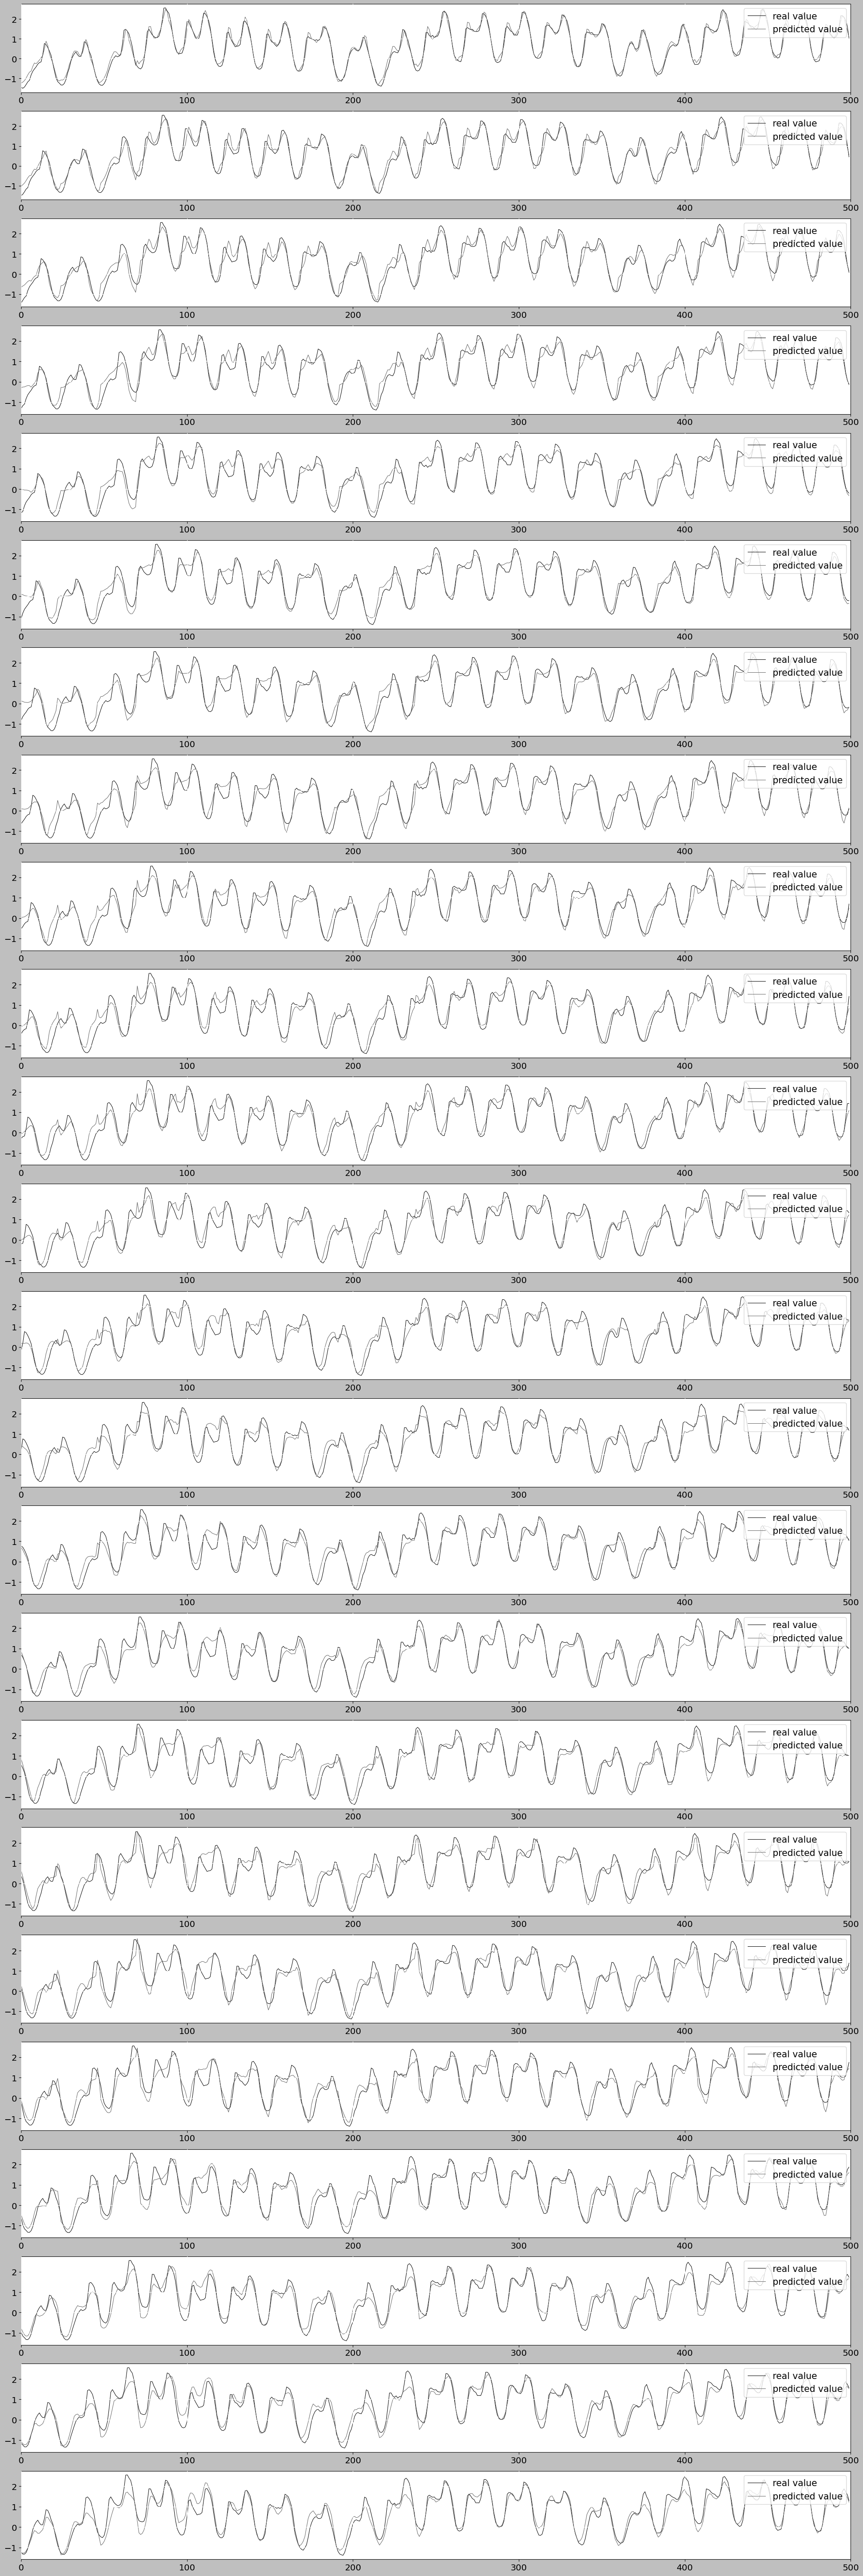

In [37]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(24, 1, figsize=(20, 60))  # Create a figure with 12 subplots
y_predict = model.predict(x_test)
y_predict_array = np.array(y_predict)
# y_predict_array = y_predict_array.reshape(len(y_test), 12)
for i in range(24):
    y_test1 = y_test[:, i]
    y_pre = y_predict_array[:, i]
    # print(y_test1.shape, y_pre.shape)
    draw = pd.concat([pd.DataFrame(y_test[:500, i]), pd.DataFrame(y_pre)], axis=1)
    draw.iloc[:, 0].plot(ax=axs[i])  # Plot y_test value in the corresponding subplot
    draw.iloc[:, 1].plot(ax=axs[i])  # Plot predicted value in the corresponding subplot
    axs[i].legend(('real value', 'predicted value'), loc='upper right', fontsize='15')
    # axs[i].title(f"Test Data vs Predicted after {i+1} hours", fontsize='20')
    axs[i].set_xlim(0, len(y_test1[:]))  # Set the x-axis limits for each subplot

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [38]:
result=pd.read_csv('/content/Results.csv')
result

,Unnamed: 0,TrialNumber,Parameters,learning_rate,MAPE
0,0,1,8-500-0.5,NaN,1.172214
1,0,2,8-500-0.1,NaN,1.588582
2,0,3,8-500-0.05,NaN,1.248258
3,0,4,8-500-0.01,NaN,1.185585
4,0,5,8-500-0.005,NaN,1.221886
...,...,...,...,...,...
59,0,60,24-1000-0.01,NaN,1.420559
60,0,61,24-1000-0.005,NaN,1.308463
61,0,62,24-1000-0.001,NaN,1.277779
62,0,63,24-1000-0.0005,NaN,1.366831


In [39]:
result[['Batch Size', 'Epochs', 'Learning Rate']]=result['Parameters'].str.split('-',expand=True)
evaluate_result=result[['Batch Size','Epochs','Learning Rate','MAPE']]
evaluate_result=evaluate_result.dropna()
evaluate_result

,Batch Size,Epochs,Learning Rate,MAPE
0,8,500,0.5,1.172214
1,8,500,0.1,1.588582
2,8,500,0.05,1.248258
3,8,500,0.01,1.185585
4,8,500,0.005,1.221886
...,...,...,...,...
59,24,1000,0.01,1.420559
60,24,1000,0.005,1.308463
61,24,1000,0.001,1.277779
62,24,1000,0.0005,1.366831


In [40]:
evaluate_result.describe()

,MAPE
count,64.000000
mean,1.454358
std,0.382901
min,1.137426
25%,1.273226
50%,1.319885
75%,1.539669
max,2.983278


In [41]:
print(evaluate_result.min())
print()
print(evaluate_result.max())

Batch Size             12
Epochs               1000
Learning Rate      0.0001
MAPE             1.137426
dtype: object

Batch Size              8
Epochs                500
Learning Rate         0.5
MAPE             2.983278
dtype: object


In [42]:
print(evaluate_result[evaluate_result.MAPE == evaluate_result.MAPE.min()])
print()
print(evaluate_result[evaluate_result.MAPE == evaluate_result.MAPE.max()])

   Batch Size Epochs Learning Rate      MAPE
25         12   1000           0.1  1.137426

   Batch Size Epochs Learning Rate      MAPE
50         24    500          0.05  2.983278


# PREDICTION FOR WHOLE YEAR

In [44]:
pd.set_option('display.max_columns', 100)
dfpredict_data = df_files[df_files['Date'].dt.year == 2023]
predict_data = dfpredict_data[['Quarter', 'Month', 'Day Of Week','Day Of Year', 'Week Of Year', 'Hour Of Day','Temperature', 'Dew Point Temperature','Relative Humidity', 'Wind Speed', 'Visibility', 'Pressure','Daily Peak', 'Hourly Demand']]
predict_data

,Quarter,Month,Day Of Week,Day Of Year,Week Of Year,Hour Of Day,Temperature,Dew Point Temperature,Relative Humidity,Wind Speed,Visibility,Pressure,Daily Peak,Hourly Demand
52584,1,1,4,1,53,0,-0.3,-5.1,70.0,20.0,24.1,99.67,16979,13417
52585,1,1,4,1,53,1,-0.3,-5.5,68.0,25.0,24.1,99.63,16979,12968
52586,1,1,4,1,53,2,-0.4,-4.7,73.0,26.0,24.1,99.59,16979,12395
52587,1,1,4,1,53,3,-0.4,-4.7,73.0,30.0,24.1,99.56,16979,12228
52588,1,1,4,1,53,4,-0.4,-5.6,68.0,31.0,24.1,99.53,16979,12116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57030,3,7,0,186,27,6,16.9,10.1,64.0,7.0,24.1,99.68,19662,14544
57031,3,7,0,186,27,7,20.0,8.2,46.0,1.0,24.1,99.67,19662,15478
57032,3,7,0,186,27,8,22.5,7.7,38.0,3.0,24.1,99.67,19662,16190
57033,3,7,0,186,27,9,24.6,8.8,36.0,10.0,24.1,99.61,19662,16643


In [45]:
scaler=StandardScaler()
predict=scaler.fit_transform(np.array(predict_data))
predict

array([[-0.99165546, -1.46334143,  0.47966419, ...,  0.28879657,
        -0.33865982, -0.8903137 ],
       [-0.99165546, -1.46334143,  0.47966419, ...,  0.24044788,
        -0.33865982, -1.09899154],
       [-0.99165546, -1.46334143,  0.47966419, ...,  0.1920992 ,
        -0.33865982, -1.36529979],
       ...,
       [ 2.74456474,  1.94803957, -1.52172447, ...,  0.28879657,
         1.1802607 ,  0.39846949],
       [ 2.74456474,  1.94803957, -1.52172447, ...,  0.21627354,
         1.1802607 ,  0.60900638],
       [ 2.74456474,  1.94803957, -1.52172447, ...,  0.14375051,
         1.1802607 ,  0.79305187]])

In [51]:
xp = np.array([np.concatenate((predict[i-2,:], predict[i-1,:], predict[i,:])) for i in range(2, len(predict)-24)])
print(f'xp.shape: {xp.shape}')
yp = np.array([np.stack([predict[i+j+1,-1] for j in range(0, 24)]) for i in range(2, len(predict)-24)])
print(f'yp.shape: {yp.shape}')

xp.shape: (4401, 42)
yp.shape: (4401, 24)


In [52]:
xp.shape
y_prediction = model.predict(xp)
y_prediction_array = np.array(y_prediction)

138/138 [==============================] - 0s 888us/step


In [53]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(yp, y_prediction)
print("Mean Absolute Percentage Error (MAPE):", mape)
print(yp.shape)
print(y_prediction.shape)
mape_values = []
for actual, predicted in zip(yp, y_prediction):
    mape_values.append(mean_absolute_percentage_error([actual], [predicted]))

worst_mape = np.max(mape_values)
best_mape = np.min(mape_values)

print("Worst MAPE:", worst_mape)
print("Best MAPE:", best_mape)


Mean Absolute Percentage Error (MAPE): 2.8031301915346347
(4401, 24)
(4401, 24)
Worst MAPE: 264.5240003609089
Best MAPE: 0.06179672310494828


##VISUALISATION

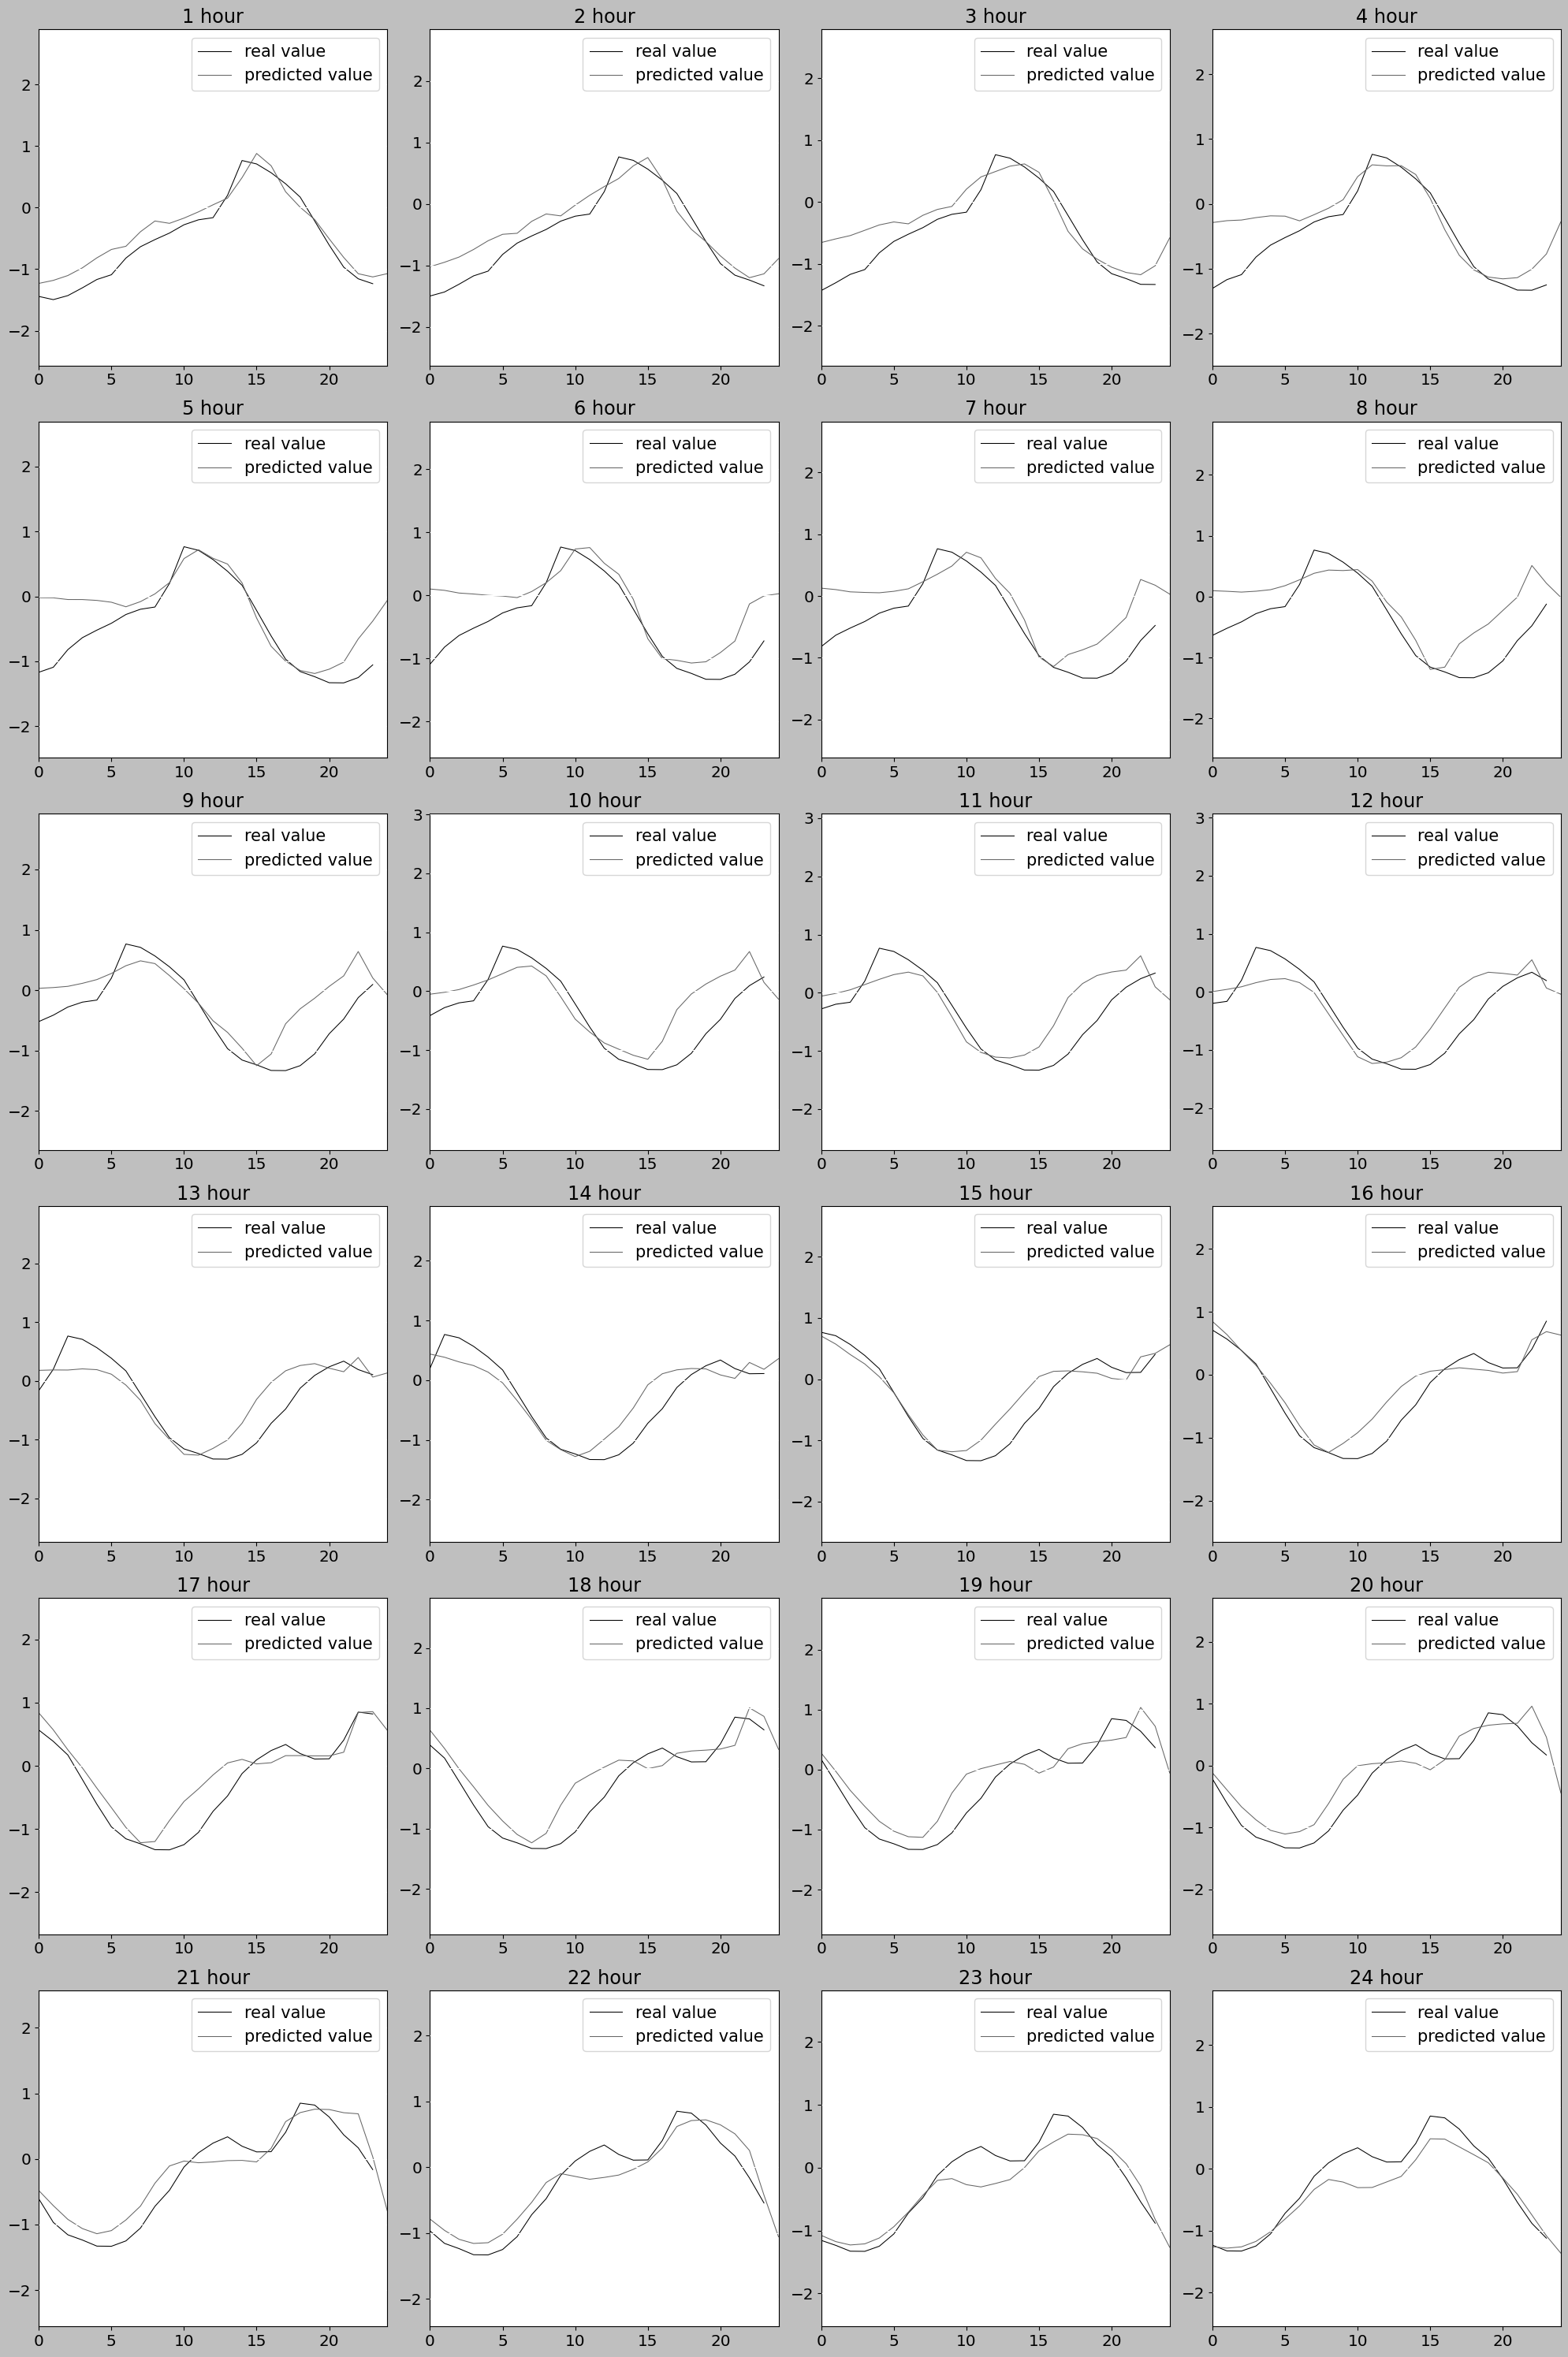

In [54]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 4, figsize=(20, 30))  # Create a figure with 6 rows and 4 columns of subplots


for i in range(24):
    row = i // 4  # Calculate the row index for the subplot
    col = i % 4  # Calculate the column index for the subplot

    y_prede = y_prediction_array[:, i]
    draw = pd.concat([pd.DataFrame(yp[:24, i]), pd.DataFrame(y_prede)], axis=1)

    axs[row, col].plot(draw.iloc[:, 0])  # Plot y_test value in the corresponding subplot
    axs[row, col].plot(draw.iloc[:, 1])  # Plot predicted value in the corresponding subplot
    axs[row, col].legend(('real value', 'predicted value'), loc='upper right', fontsize='15')
    axs[row, col].set_xlim(0, len(yp[:24]))  # Set the x-axis limits for each subplot
    axs[row, col].set_title(f"{i+1} hour")  # Add a title to the subplot indicating the hour

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [55]:
df_predict_aggregate = pd.DataFrame(columns=['prediction_agg', 'actual'])

def aggregate_plot(y_actual, y_pred):
    y_mean_pred = []
    for j in range(23, -1, -1):
        sum = 0
        for i in range(0, 24):
            if j - i >= 0:
                sum += y_pred[i][j - i]
        y_mean_pred.append(sum / (j + 1))
    y_mean_pred = list(reversed(y_mean_pred))
    df_predict_aggregate['prediction_agg'] = y_mean_pred
    df_predict_aggregate['actual'] = y_actual

    mape = mean_absolute_percentage_error(yp, y_prediction)
    print("MAPE:", mape)

    # Find the position and value of the highest predicted value
    max_value = max(y_mean_pred)
    max_index = y_mean_pred.index(max_value)
    # print("Highest Predicted Value:", max_value)
    print("Position of Highest Predicted Value:", max_index)

    plt.plot(y_actual, marker='*', color='blue')
    plt.plot(y_mean_pred, marker='+', color='red')
    plt.legend(('Real Value', 'Predicted Value'), loc='upper right', fontsize='15')
    plt.show()

In [56]:
df_predict_aggregate

,prediction_agg,actual


MAPE: 2.8031301915346347
Position of Highest Predicted Value: 15


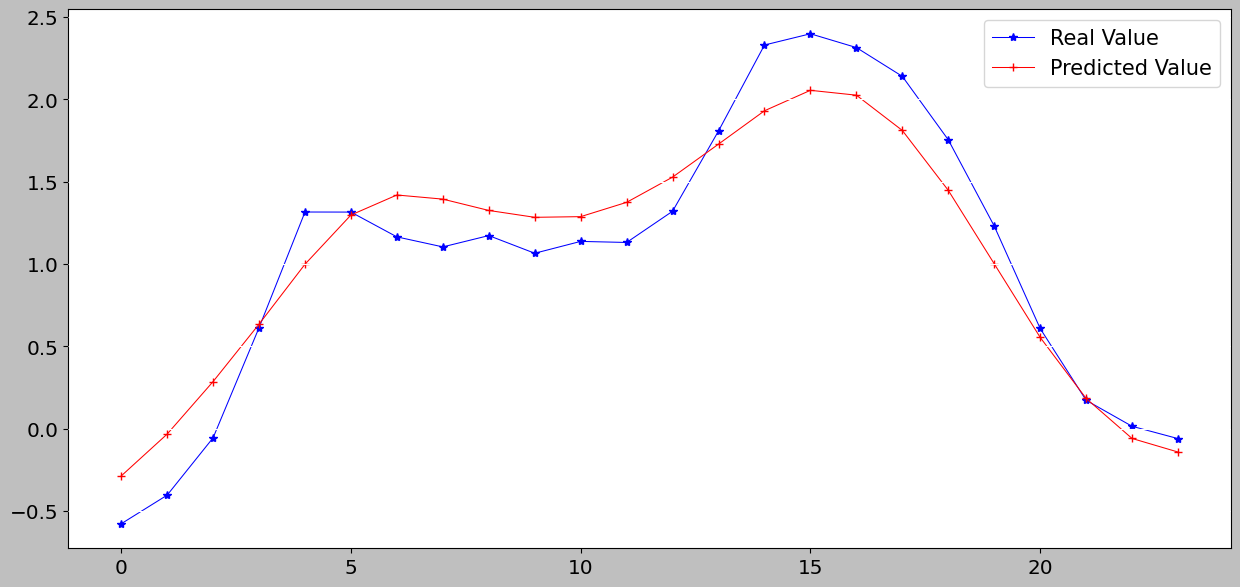

In [57]:
aggregate_plot(yp[240], y_prediction[240:264])